### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [104]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt

1. display 5 columns from dataset

In [105]:
#1
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv")
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [106]:
#2
df.info()

#conclusion
# The info column shows us the datatype of each column, with the most being object or string, and the least being int and boolean.
# There is 10 columns with 6194 rows, with 2 of the 10 columns having missing values, where the admission have more than 80% missing data.
# Since both "race" and "admission" have missing values, strategies to fill the columns or careful handling may be required if these columns are important for or modeling.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [107]:
#3a
admission_counts = df['admission'].value_counts(dropna = False)

print(admission_counts)

admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


In [108]:
#3b
race_counts = df['race'].value_counts(dropna = False)

print(race_counts)

race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [109]:
#4
df['admission'].fillna('Deny', inplace=True)
df['race'].fillna('Other', inplace=True)

<ipython-input-109-4c52867b0f1c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('Deny', inplace=True)
<ipython-input-109-4c52867b0f1c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

5. recheck missing value

In [110]:
#5
df.isnull().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [111]:
# 6
df.drop('application_id', axis = 1, inplace = True)

7. show describe column and conclude what the insight is from that column

In [112]:
#7
df.describe()

#conclusion
# The conclusion of the describe table is that the describe table will only show the statistics of columns with numeric values (int and float/double).
# We can see the mean for each columns, with the gpa being 3.25, gmat being 6.51, and work experience being 5.01
# We can also see the standard deviation for each, and the minimum and maximum values of each column
# Lastly, we can see each quartile of the data

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

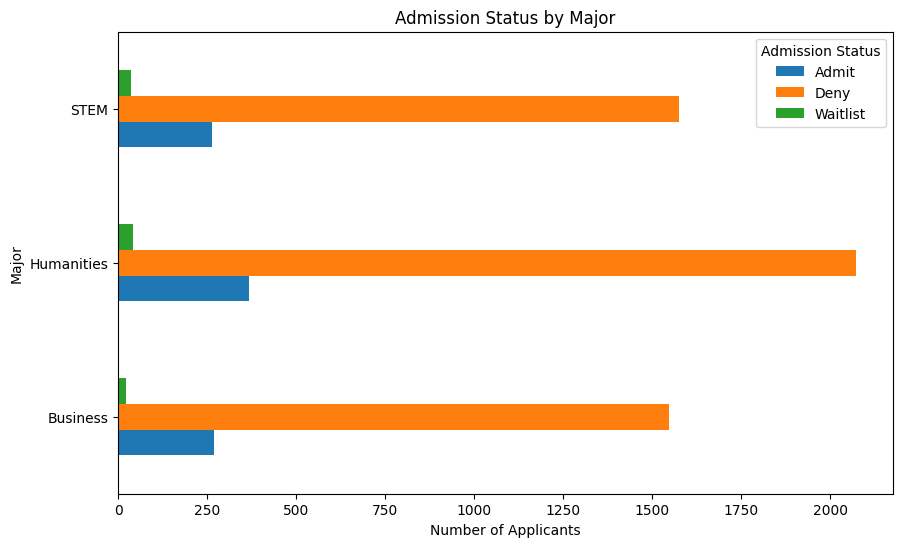

In [113]:
#8
count_admission_by_major = df.groupby(['major',
'admission'])['admission'].count().unstack()

count_admission_by_major.plot (kind='barh', figsize=(10,6))
plt.title('Admission Status by Major')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='Admission Status')
plt.show()

# Conclusion
# Humanities has the most applicants, as well as the most admitted and denied, even waitlisted.
# The STEM and Business major have a similar number of students, and similar number of admission status as well.
# The waitlist percentage of the STEM major students might be the highest, but this must be further proven by other visualizations.

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

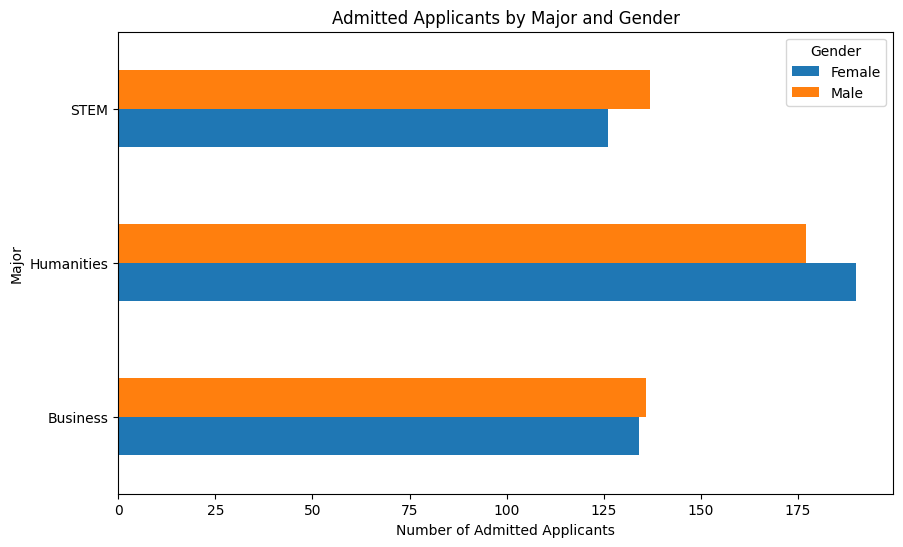

In [114]:
#9
admitted_df = df[df['admission'] == 'Admit']

count_major_by_gender = admitted_df.groupby(['major',
'gender'])['gender'].count().unstack()

count_major_by_gender.plot (kind='barh', figsize=(10,6))
plt.title('Admitted Applicants by Major and Gender')
plt.xlabel('Number of Admitted Applicants')
plt.ylabel('Major')
plt.legend(title='Gender')
plt.show()

# Conclusion
# The admitted applicants are mostly balanced between female and male, with humanities having more females, and STEM and business having more males, with the three having tight margins.
# The Business major has a more balanced number of males and females admitted.
# Overall, the humanities major students have the most students admitted, and the other two having the least with maybe the Business major having more (needs to be proven with other visualizations).

10. create your own insightful visualization and explain it in at least 2 sentences

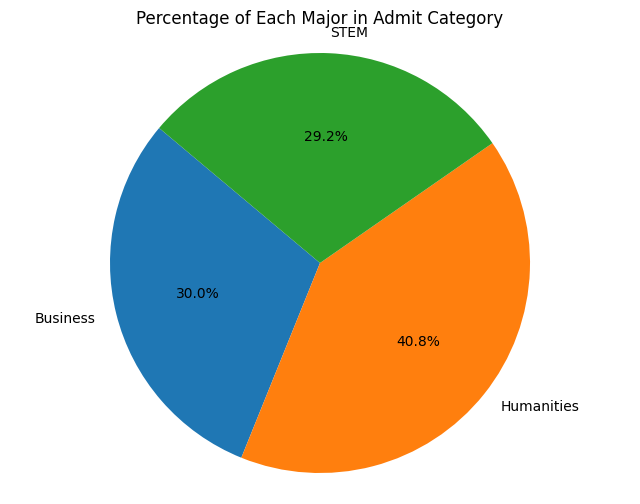

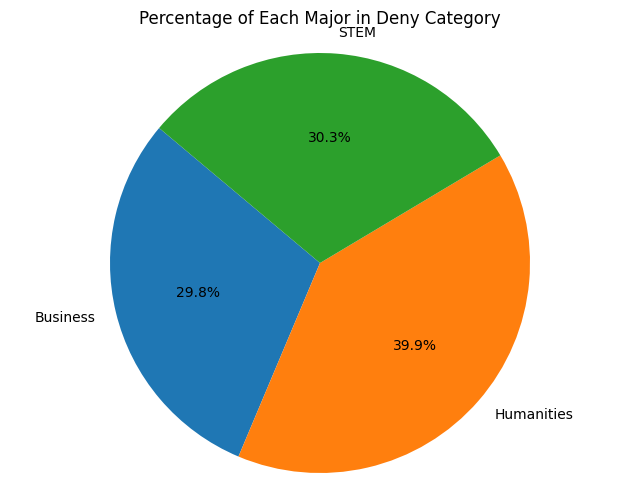

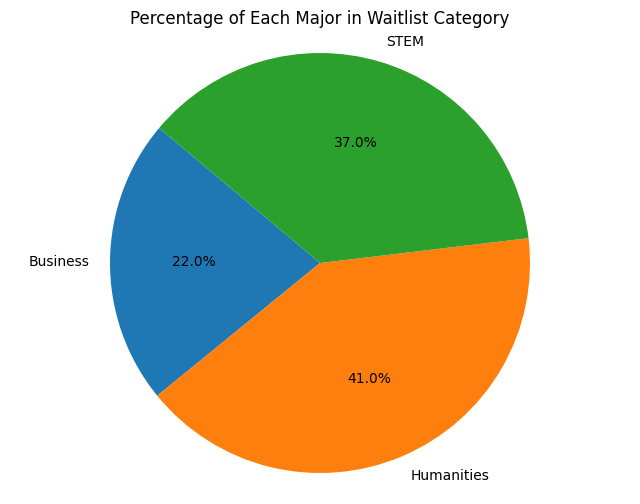

In [115]:
#10
count_admission_by_major = df.groupby(['major', 'admission'])['admission'].count().unstack(fill_value=0)

percentage_admission_by_major = count_admission_by_major.div(count_admission_by_major.sum(axis=0), axis=1) * 100

for admission_category in percentage_admission_by_major.columns:
    plt.figure(figsize=(8, 6))
    plt.pie(percentage_admission_by_major[admission_category],
            labels=percentage_admission_by_major.index,
            autopct='%1.1f%%',
            startangle=140)
    plt.title(f'Percentage of Each Major in {admission_category} Category')
    plt.axis('equal')
    plt.show()

# Conclusion
# For the admitted students, the majority are from the humanities major, where the STEM and Business major have a close number of admitted students
# For the denied students, it is similar to the admit category, with the most from humanities, and the least being business (close to STEM)
# For the waitlisted students, The most are still from humanities, however the STEM major is closing up having a margin of 4%, and lastly the business major only gives 22%
# This visualization proves my conclusion for my number 8.

11. create your own insightful visualization and explain it in at least 2 sentences

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


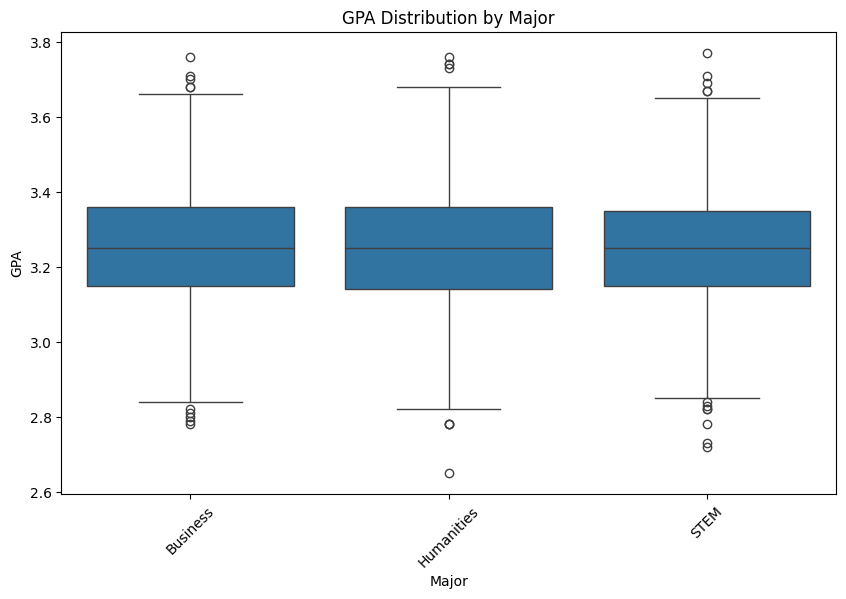

In [116]:
#11
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='major', y='gpa')
plt.title('GPA Distribution by Major')
plt.xticks(rotation=45)
plt.xlabel('Major')
plt.ylabel('GPA')
plt.show()

# Conclusion
# The major with the widest range is the humanities major, which makes sense due to the more number of students
# The major with the smallest range is the STEM major, however the STEM major might have more outliers than the others

12. encode categorical columns and display the results

In [117]:
#12a
#encode X
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['gender'] = encoder.fit_transform(df['gender'])
df['international'] = encoder.fit_transform(df['international'])
df['major'] = encoder.fit_transform(df['major'])
df['race'] = encoder.fit_transform(df['race'])
df['work_exp'] = encoder.fit_transform(df['work_exp'])
df['work_industry'] = encoder.fit_transform(df['work_industry'])

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,2,3,Admit
1,1,0,3.28,1,1,680.0,4,6,Deny
2,0,1,3.30,0,3,710.0,4,13,Admit
3,1,0,3.47,2,1,690.0,5,13,Deny
4,1,0,3.35,2,2,590.0,4,1,Deny


In [118]:
#12b
#encode y
df['admission'] = encoder.fit_transform(df['admission'])

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,2,3,0
1,1,0,3.28,1,1,680.0,4,6,1
2,0,1,3.30,0,3,710.0,4,13,0
3,1,0,3.47,2,1,690.0,5,13,1
4,1,0,3.35,2,2,590.0,4,1,1


13. create a heatmap to see the correlation and explain the conclusion

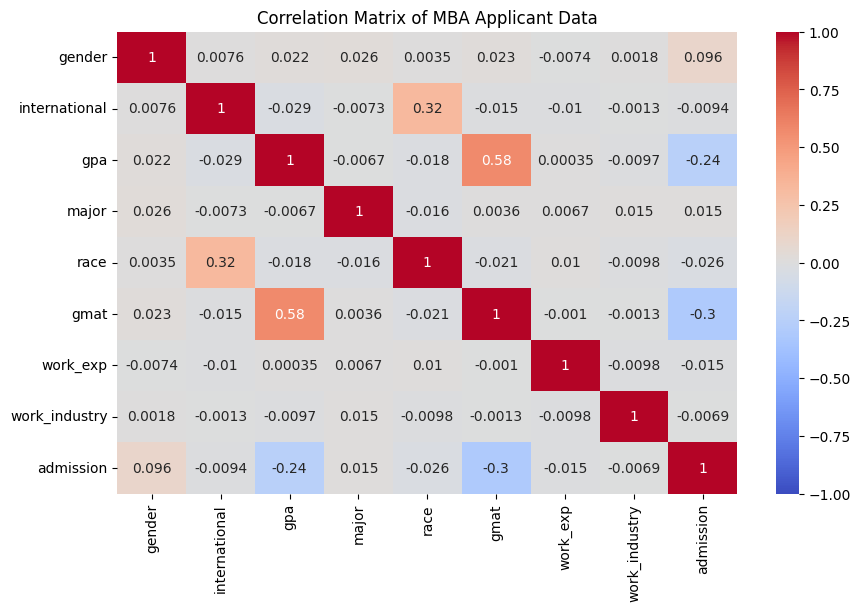

In [119]:
#13
import seaborn as sns
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Correlation Matrix of MBA Applicant Data')

plt.show()

#Conclusion
# In the correlation matrix, the most related column is the GPA and GMAT, which are both a negative correlation (the value contradicts the admission value).
# The most unrelated entity is the international and work_industry column (4 decimals)
# This indicates that the admission process is defined mostly by the GPA and GMAT scores of the applicants.

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [147]:
#Challenge
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X = df[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry']]
y = df['admission']
label_encoder = LabelEncoder()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

dtree = RandomForestClassifier(n_estimators=200, random_state=42)

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(accuracy))

Lisa_data = {
    'gender': 0, 'international': 1, 'gpa' : df['gpa'].mean(), 'major': 0, 'race' : 0, 'gmat' : 580, 'work_exp' : 2, 'work_industry': 3
}
df_lisa = pd.DataFrame([Lisa_data])
predict = dtree.predict(df_lisa)
print("Predicted admission status (encoded): {}".format(predict))

admission = encoder.inverse_transform(predict)

print("The admission status of Lisa is:", admission[0])

Accuracy: 0.8305084745762712
Predicted admission status (encoded): [1]
The admission status of Lisa is: Deny
